# Detección de anomalías y técnicas de agrupamiento
## RafaCastle

In [2]:
# librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# gráficos
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

# preparación
from sklearn import preprocessing

# modelos 
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor

dataset : https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection

In [3]:
df = pd.read_csv('creditcardcsvpresent.csv')

In [4]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


## Análisis descriptivo de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [6]:
# quitar la columna que tiene nulos
df.drop(columns=['Transaction date'],inplace=True)

De las variables numéricas, hallar los datos estadísticos

In [7]:
# Valores categóricos
df_categorico = df[['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']].astype(str)

# Valores numéricos
df_numerico = df.drop(df_categorico.columns, axis=1)

# Descripción de los valores numéricos
df_numerico.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Merchant_id,3075.0,5.026634e+09,987077811.1,3.160041e+09,4.170814e+09,5.025578e+09,5.889625e+09,6.665906e+09
Average Amount/transaction/day,3075.0,5.150000e+02,291.9,4.000000e+00,2.698000e+02,5.025000e+02,7.653000e+02,2.000000e+03
Transaction_amount,3075.0,9.876400e+03,10135.3,0.000000e+00,2.408800e+03,6.698900e+03,1.442260e+04,1.080000e+05
Total Number of declines/day,3075.0,1.000000e+00,2.2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Daily_chargeback_avg_amt,3075.0,5.570000e+01,206.6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+02
6_month_avg_chbk_amt,3075.0,4.000000e+01,156.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+02
6-month_chbk_freq,3075.0,4.000000e-01,1.5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00


De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas

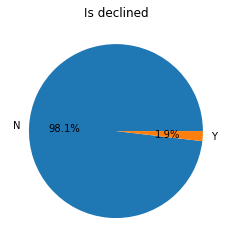

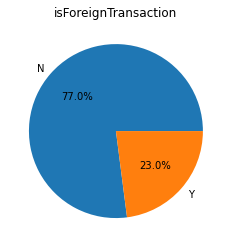

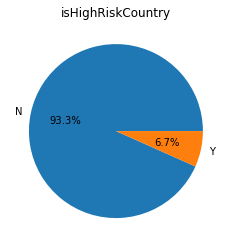

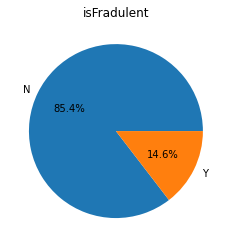

In [8]:
# Descripción de los valores categóricos
for i, valor in enumerate(df_categorico.columns):
    
    value_counts = df_categorico[valor].value_counts()
    etiquetas = value_counts.index.tolist()
    valores = value_counts.values.tolist()

    # Gráfico de tarta
    plt.pie(
        value_counts,
        labels=etiquetas,
        autopct='%1.1f%%')
    plt.title(valor)
    plt.show()

Exploración de las variables para escoger las gráficas más representativas:

Average Amount/transaction/day vs Merchant_id


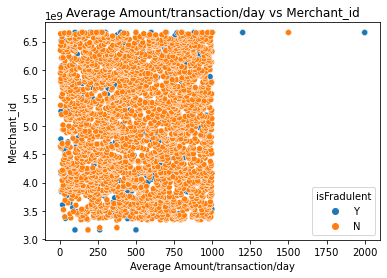

Transaction_amount vs Merchant_id


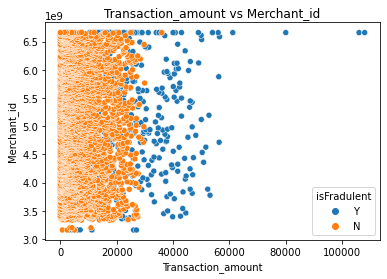

Transaction_amount vs Average Amount/transaction/day


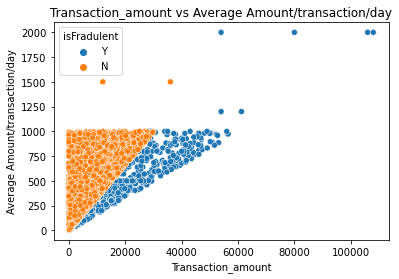

Total Number of declines/day vs Merchant_id


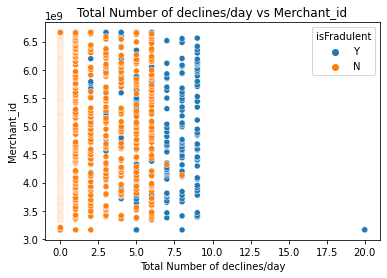

Total Number of declines/day vs Average Amount/transaction/day


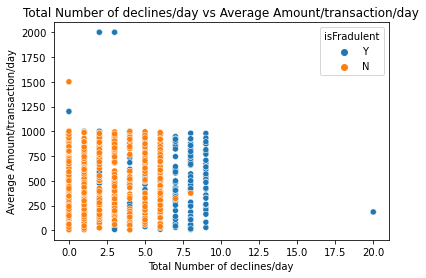

Total Number of declines/day vs Transaction_amount


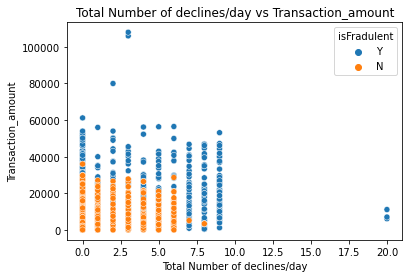

Daily_chargeback_avg_amt vs Merchant_id


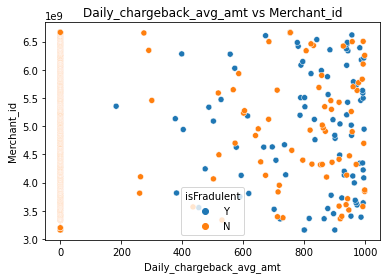

Daily_chargeback_avg_amt vs Average Amount/transaction/day


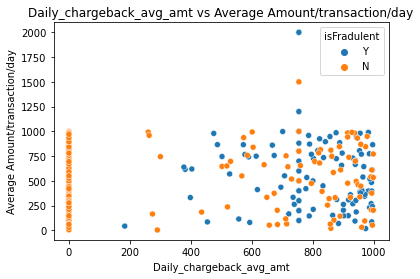

Daily_chargeback_avg_amt vs Transaction_amount


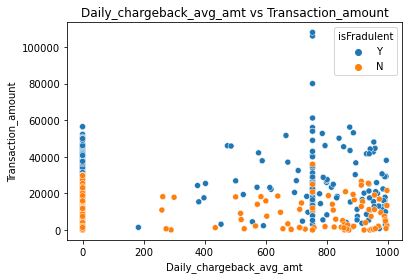

Daily_chargeback_avg_amt vs Total Number of declines/day


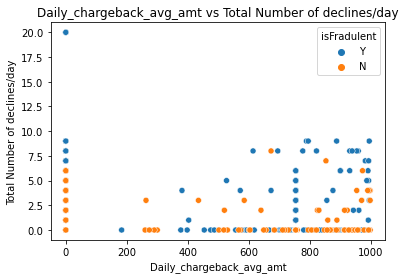

6_month_avg_chbk_amt vs Merchant_id


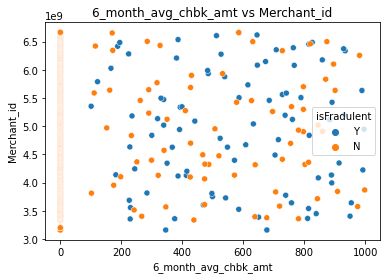

6_month_avg_chbk_amt vs Average Amount/transaction/day


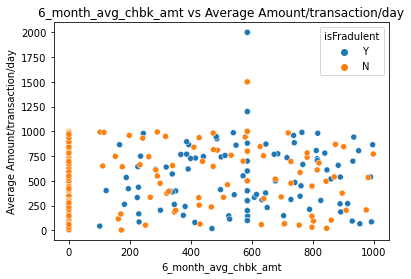

6_month_avg_chbk_amt vs Transaction_amount


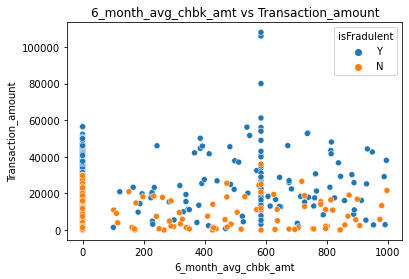

6_month_avg_chbk_amt vs Total Number of declines/day


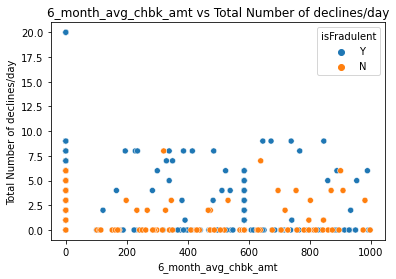

6_month_avg_chbk_amt vs Daily_chargeback_avg_amt


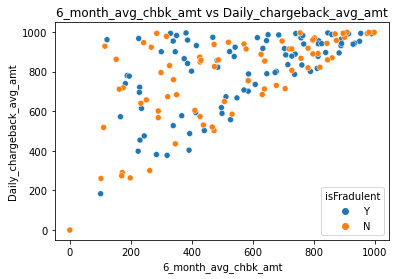

6-month_chbk_freq vs Merchant_id


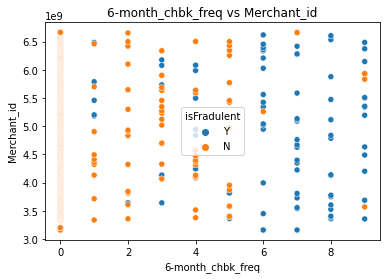

6-month_chbk_freq vs Average Amount/transaction/day


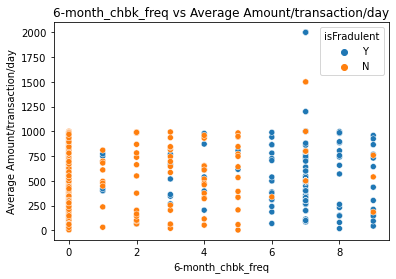

6-month_chbk_freq vs Transaction_amount


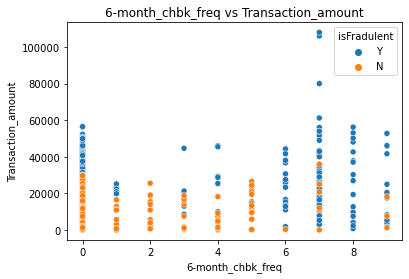

6-month_chbk_freq vs Total Number of declines/day


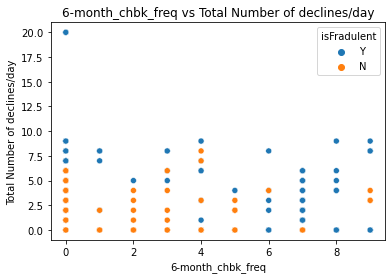

6-month_chbk_freq vs Daily_chargeback_avg_amt


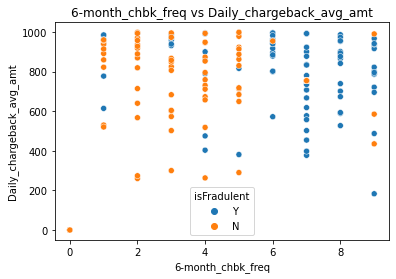

6-month_chbk_freq vs 6_month_avg_chbk_amt


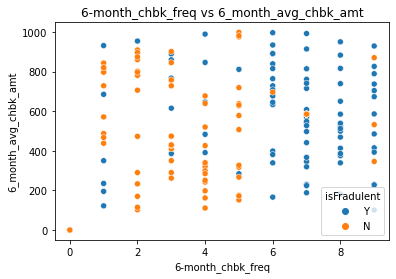

In [9]:
for i1,i in enumerate(df_numerico.columns):
    for j1,j in enumerate(df_numerico.columns):
        if i1>j1:
            print(f'{i} vs {j}')
            sns.scatterplot(data = df, x=i, y=j, hue='isFradulent')
            plt.title(f'{i} vs {j}')
            plt.show()

Las gráficas más representativas son:

- Transaction amount vs merchan id con la etiqueta 'isfradulent': muestra que las transacciones más grandes son las mas propensas a ser fraudulentas.

- Transaction amount vs average amount/transactiuon/day con la etiqueta 'isfradulent': Muestra una división muy marcada, que reafirma que las transacciones grandes son las fraudulentas.

Total Number of declines/day vs Average Amount/transaction/day


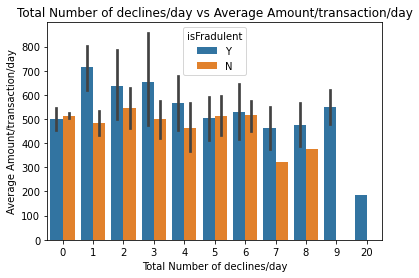

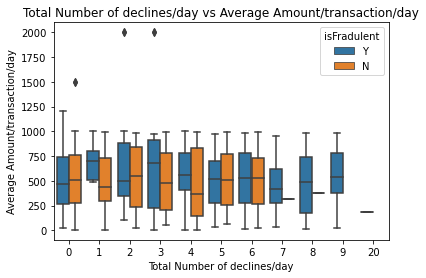

Total Number of declines/day vs Average Amount/transaction/day


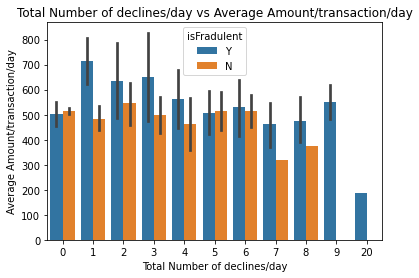

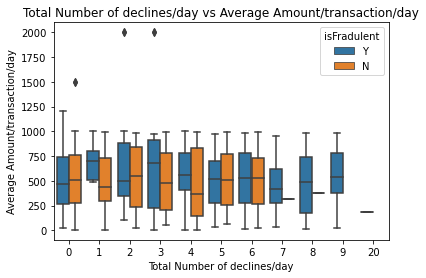

Total Number of declines/day vs Transaction_amount


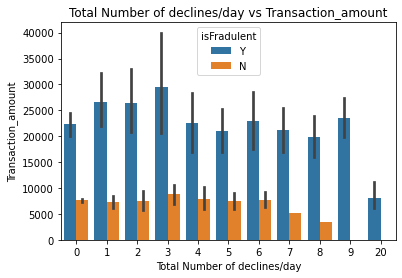

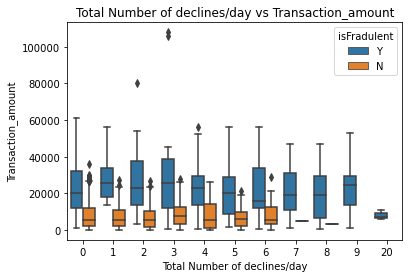

Total Number of declines/day vs Daily_chargeback_avg_amt


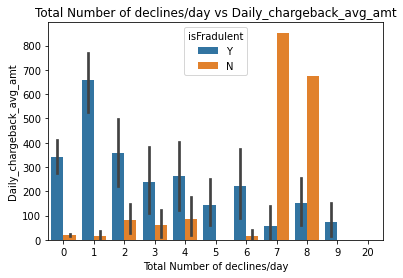

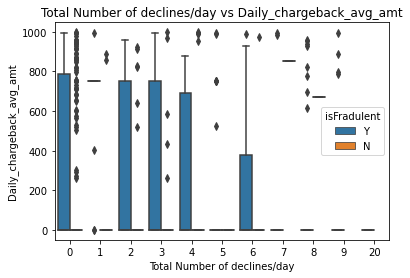

Total Number of declines/day vs Merchant_id


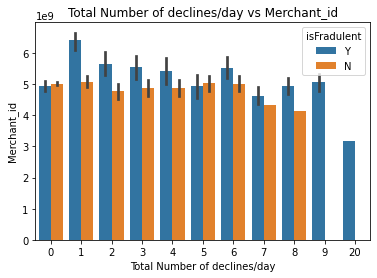

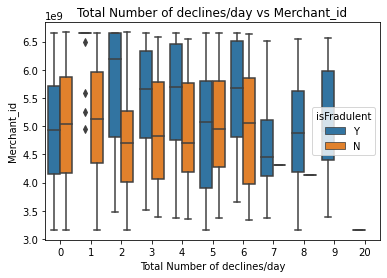

6-month_chbk_freq vs Average Amount/transaction/day


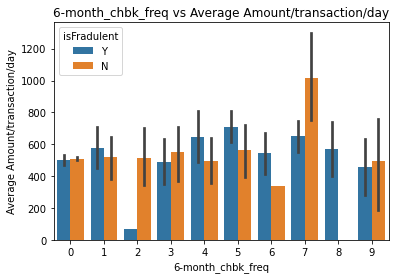

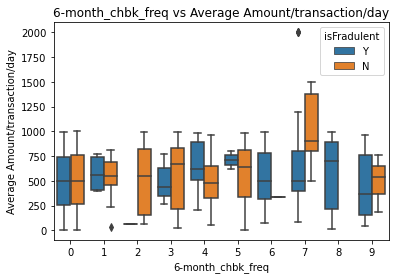

6-month_chbk_freq vs Average Amount/transaction/day


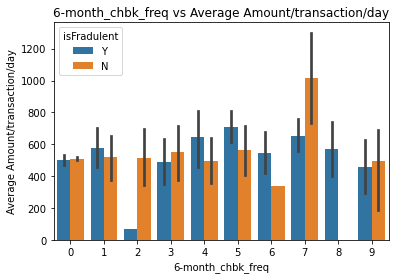

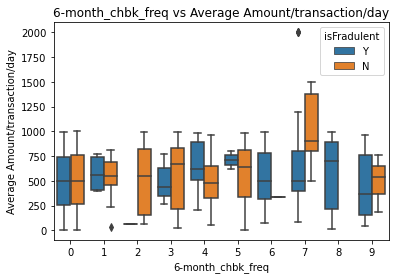

6-month_chbk_freq vs Transaction_amount


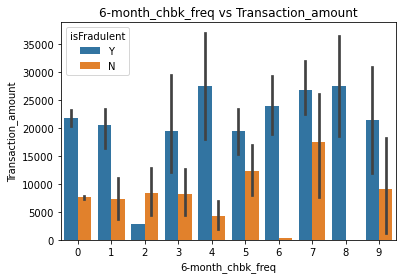

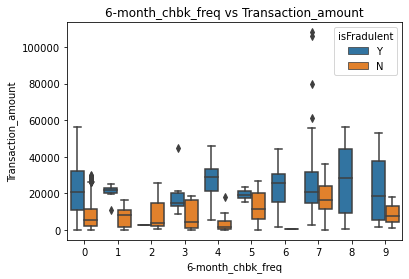

6-month_chbk_freq vs Daily_chargeback_avg_amt


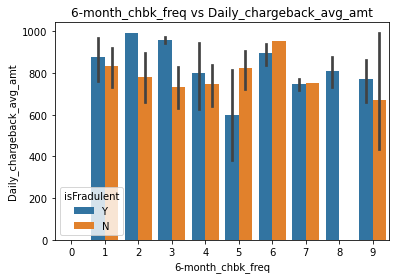

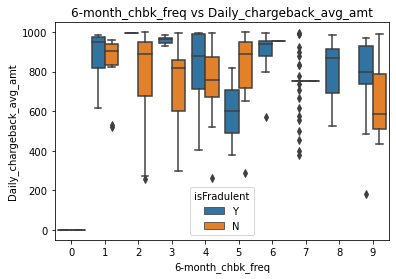

6-month_chbk_freq vs Merchant_id


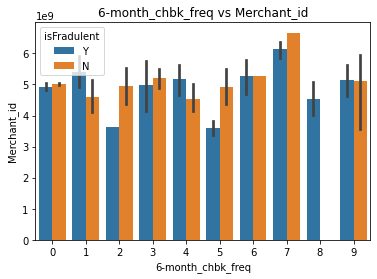

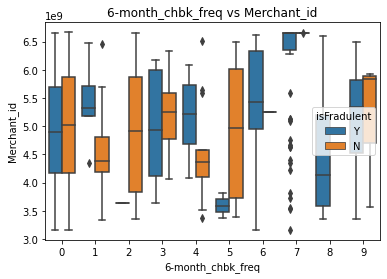

In [10]:
boxes_x = ['Total Number of declines/day','6-month_chbk_freq']
boxes_y = ['Average Amount/transaction/day','Average Amount/transaction/day','Transaction_amount','Daily_chargeback_avg_amt','Merchant_id']

for i1,i in enumerate(boxes_x): 
    for j1,j in enumerate(boxes_y):
        print(f'{i} vs {j}')
        sns.barplot(data=df, x=i, y=j, hue='isFradulent')
        plt.title(f'{i} vs {j}')
        plt.show()
        sns.boxplot(data=df, x=i, y=j, hue='isFradulent')
        plt.title(f'{i} vs {j}')
        plt.show()

La gráfica más representativa es:

- Total Number of declines/day vs Transaction amount con la etiqueta 'isfradulent': Muestra la correlación entre el número de transacciones rechazadas con la magnitud de las transacciones, reafirmando que las transacciones grandes son las más propensas a ser fraudulentas.


Convirtiendo las variables numéricas a categóricas

In [11]:
df_categorico = df_categorico.apply(preprocessing.LabelEncoder().fit_transform)

for i in df_categorico:
    df[i]=df_categorico[i]

Crear la matriz de correlaciones existentes entre las variables numéricas del conjunto de datos y analizar los resultados

<AxesSubplot:>

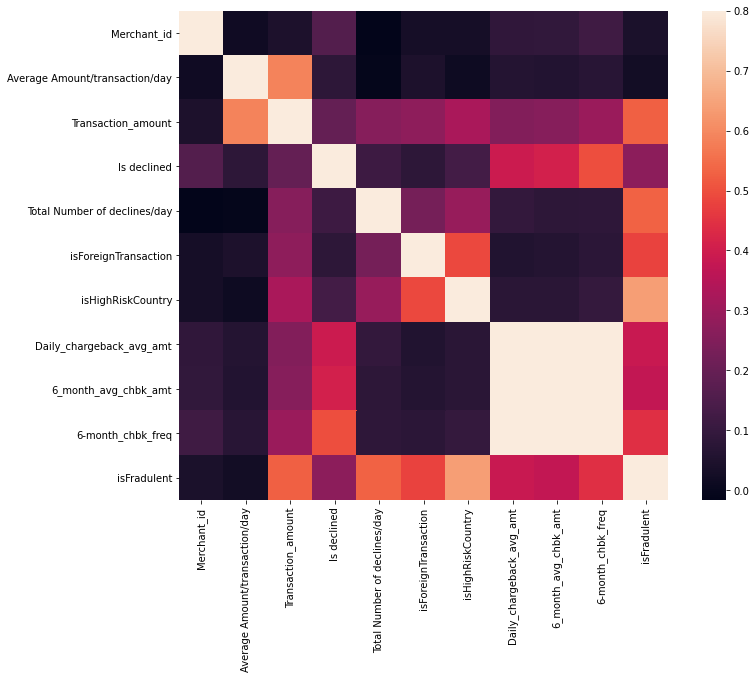

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Correlación con la variable objetivo

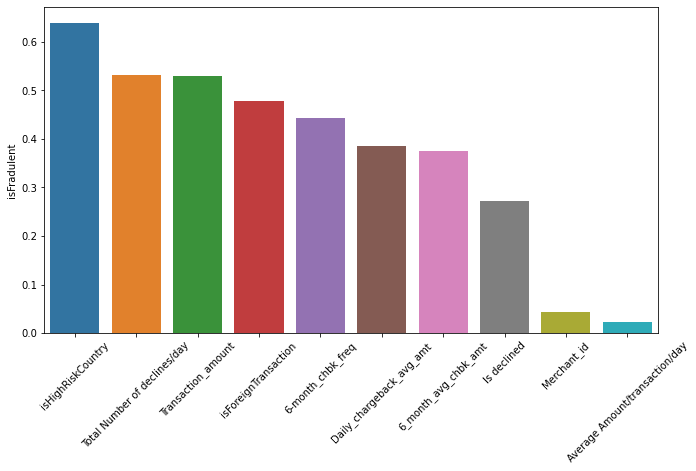

In [13]:
correlacion_objetivo = corrmat[(corrmat['isFradulent']<1)][['isFradulent']].sort_values(by='isFradulent',ascending=False)

plt.figure(figsize=(11,6)) 
sns.barplot(data=correlacion_objetivo, x = correlacion_objetivo.index, y = 'isFradulent', orient="v")
plt.xticks(rotation=45)
plt.show()

Las variables merchant_id y average Amount/transaction/day no están correlacionadas. Por lo que serán retiradas, por otro lado las variables semestrales muestran una correlación casi perfecta con la variable daily_chargeback_avg_amt por lo que serán retiradas también.

### Preprocesamiento

In [14]:
robust = preprocessing.RobustScaler()

In [15]:
df[['Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent']] = robust.fit_transform(df[['Average Amount/transaction/day', 'Transaction_amount',
                                                   'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
                                                   'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
                                                   '6-month_chbk_freq', 'isFradulent']])

## Algoritmo IsolationForest

In [16]:
# Crear objeto IsolationForest
clf = IsolationForest(random_state=42)

# Entrenar el modelo
clf.fit(df.drop(columns = ['isFradulent','Average Amount/transaction/day','6_month_avg_chbk_amt','6-month_chbk_freq']))

# Predecir las anomalías
pred = clf.predict(df.drop(columns =  ['isFradulent','Average Amount/transaction/day','6_month_avg_chbk_amt','6-month_chbk_freq']))

# Agregar una columna con las predicciones al DataFrame original
df['anomalia_iso'] = pred

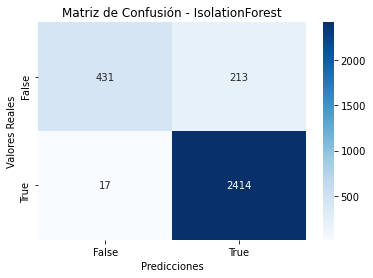

In [17]:
if_tp = len(df[(df['anomalia_iso']==-1)&(df['isFradulent']==1)])
if_fp = len(df[(df['anomalia_iso']==-1)&(df['isFradulent']==0)])
if_tn = len(df[(df['anomalia_iso']==1)&(df['isFradulent']==0)])
if_fn = len(df[(df['anomalia_iso']==1)&(df['isFradulent']==1)])

cm_if = np.array([[if_tp, if_fp], [if_fn, if_tn]])

sns.heatmap(cm_if, annot=True, cmap='Blues', fmt='g', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Matriz de Confusión - IsolationForest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


## DBSCAN

In [18]:
# Detectar anomalías utilizando DBSCAN
dbscan = DBSCAN(eps=1500000, min_samples=4)

# Entrenando
dbscan.fit(df.drop(columns = ['isFradulent','Average Amount/transaction/day','6_month_avg_chbk_amt','6-month_chbk_freq']))

# Entrenar el modelo y predecir las anomalías
pred = dbscan.fit_predict(df.drop(columns = ['isFradulent','Average Amount/transaction/day','6_month_avg_chbk_amt','6-month_chbk_freq']))

# Agregar una columna con las predicciones al DataFrame original
df['anomalia_dbscan'] = pred

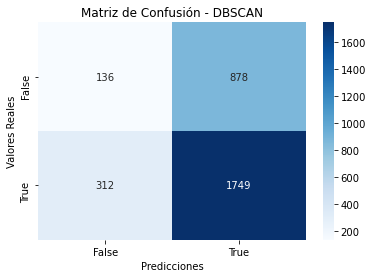

In [20]:
db_tp = len(df[(df['anomalia_dbscan']==-1)&(df['isFradulent']==1)])
db_fp = len(df[(df['anomalia_dbscan']==-1)&(df['isFradulent']==0)])
db_tn = len(df[(df['anomalia_dbscan']!=-1)&(df['isFradulent']==0)])
db_fn = len(df[(df['anomalia_dbscan']!=-1)&(df['isFradulent']==1)])

cm_db = np.array([[db_tp, db_fp], [db_fn, db_tn]])

sns.heatmap(cm_db, annot=True, cmap='Blues', fmt='g', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Matriz de Confusión - DBSCAN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()